## Lifting over the polygenic score


In [4]:
cat(system("
pip3 install CrossMap", intern=T), sep="\n")

Defaulting to user installation because normal site-packages is not writeable


In [56]:
cat(system('
wget https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS000337/ScoringFiles/PGS000337.txt.gz
', intern=T), sep="\n")


In [1]:
library(data.table)
cadscore=fread("PGS000337.txt.gz")

In [2]:
cadscore[,start:=chr_position - 1]
setcolorder(cadscore, c("chr_name", "start", colnames(cadscore)[2:5]))
fwrite(cadscore, "cad.bed", col.names=F, sep="\t", quote=F)

In [3]:
cat(system('
(rm *.chain.gz || echo downloading) && wget https://hgdownload.cse.ucsc.edu/goldenpath/hg19/liftOver/hg19ToHg38.over.chain.gz 2>&1
', intern=T), sep="\n")


downloading
--2021-11-24 05:08:12--  https://hgdownload.cse.ucsc.edu/goldenpath/hg19/liftOver/hg19ToHg38.over.chain.gz
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227698 (222K) [application/x-gzip]
Saving to: 'hg19ToHg38.over.chain.gz'

     0K .......... .......... .......... .......... .......... 22%  147K 1s
    50K .......... .......... .......... .......... .......... 44%  295K 1s
   100K .......... .......... .......... .......... .......... 67% 43.2M 0s
   150K .......... .......... .......... .......... .......... 89% 1.24M 0s
   200K .......... .......... ..                              100% 31.2M=0.6s

2021-11-24 05:08:13 (404 KB/s) - 'hg19ToHg38.over.chain.gz' saved [227698/227698]



In [4]:
cat(system('
gunzip *chain.gz
~/.local/bin/CrossMap.py bed hg19ToHg38.over.chain cad.bed cad.38.bed 2>&1
', intern=T), sep="\n")


2021-11-24 05:08:18 [INFO]  Read the chain file "hg19ToHg38.over.chain" 


In [5]:
liftedover=fread("cad.38.bed")

In [6]:
setnames(liftedover, colnames(cadscore))
head(liftedover)

chr_name,start,chr_position,effect_allele,effect_weight,variant_description
<chr>,<int>,<int>,<chr>,<dbl>,<chr>
1,1023850,1023851,A,0.0113215,1:959231:G:A
1,1184477,1184478,T,-0.0165875,1:1119858:C:T
1,1186643,1186644,C,0.0135431,1:1122024:T:C
1,1219477,1219478,T,-0.0243073,1:1154858:C:T
1,1236036,1236037,T,-0.0126844,1:1171417:C:T
1,1274971,1274972,G,-0.0193357,1:1210352:A:G


In [7]:
liftedover[,start:=NULL]

In [8]:
nrow(liftedover)

[1] 75001

In [9]:
liftedover=liftedover[chr_name %in% 1:22,]

In [10]:
nrow(liftedover)

[1] 74999

In [ ]:
ct=liftedover[,.N,by=variant_description]

In [9]:
cat(system('
wget https://www.dropbox.com/s/o71gg622t2vnjqu/MEP1B.gilly.prs.txt?dl=1 -O MEP1B.gilly.prs.txt 2>&1
wget -O PRS.course.forscore.tar.gz https://www.dropbox.com/s/civmjfv89ou72cc/PRS.course.forscore.tar.gz?dl=1 && tar -xvzf PRS.course.forscore.tar.gz 2>&1
wget -O PRS.course.geno.tar.gz https://www.dropbox.com/s/oml7xw36yse7lld/PRS.course.geno.tar.gz?dl=1 && tar -xvzf PRS.course.geno.tar.gz 2>&1
', intern=T), sep="\n")

--2021-11-23 10:38:01--  https://www.dropbox.com/s/o71gg622t2vnjqu/MEP1B.gilly.prs.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/o71gg622t2vnjqu/MEP1B.gilly.prs.txt [following]
--2021-11-23 10:38:02--  https://www.dropbox.com/s/dl/o71gg622t2vnjqu/MEP1B.gilly.prs.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8cef4ff1e00cdffade5ec96f5d.dl.dropboxusercontent.com/cd/0/get/BahOvQYkIG0DgQjui9p0MSLlWWAGEZsmNii8V6nGPLN6iTPPR8d1z_7gxqQ4YLiHqlm9p8TnGwwZqEt19xK5mFO8dRmT4bHjs0v0oCrn_UUcgGtN4cmwHe_dhG7isWHh934s8uf7PpJO2Z8eHAM8dGFK/file?dl=1# [following]
--2021-11-23 10:38:03--  https://uc8cef4ff1e00cdffade5ec96f5d.dl.dropboxusercontent.com/cd/0/get/BahOvQYkIG0DgQjui9p0MSLlWWAGEZsmNii8V6nGPLN6iTPPR8d1z_7gxqQ4YLiH

In [10]:
cadscore=liftedover
cadscore[,id:=paste0("chr", chr_name, ":", chr_position)]
fwrite(cadscore[,c("id", "effect_allele", "effect_weight")], "CAD.score", sep="\t", col.names=F, quote=F)

In [11]:
mepscore=fread("MEP1B.gilly.prs.txt")

In [12]:
mepscore[,id:=paste0("chr", chr, ":", pos)]
fwrite(mepscore[,c("id", "A1", "effect")], "MEP1B.score", sep="\t", col.names=F, quote=F)

In [13]:
cat(system('
head *.score
', intern=T), sep="\n")

==> CAD.score <==
chr1:1023851	A	0.0113215
chr1:1184478	T	-0.0165875
chr1:1186644	C	0.0135431
chr1:1219478	T	-0.0243073
chr1:1236037	T	-0.0126844
chr1:1274972	G	-0.0193357
chr1:1276547	T	-0.0211415
chr1:1277415	A	-0.0213939
chr1:1279698	G	-0.0209343
chr1:1284756	G	-0.0178729

==> MEP1B.score <==
chr18:32038169	T	-0.2891709
chr18:32067215	C	0.4230704
chr18:32208550	G	-0.6470447
chr18:32224458	T	-0.6871607
chr18:32224900	A	-1.070113
chr18:32317264	C	-0.556034
chr18:32337385	C	0.3294772


## Applying scores

### Method 1 : using PLINK

In [14]:
cat(system('
./plink --bfile autosomal.forPRS --score CAD.score --out CAD
./plink --bfile autosomal.forPRS --score MEP1B.score --out MEP1B
', intern=T), sep="\n")

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to CAD.log.
Options in effect:
  --bfile autosomal.forPRS
  --out CAD
  --score CAD.score

3095754 MB RAM detected; reserving 1547877 MB for main workspace.
75624 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to CAD.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%61%62%63%64%6

#### Visualising scores

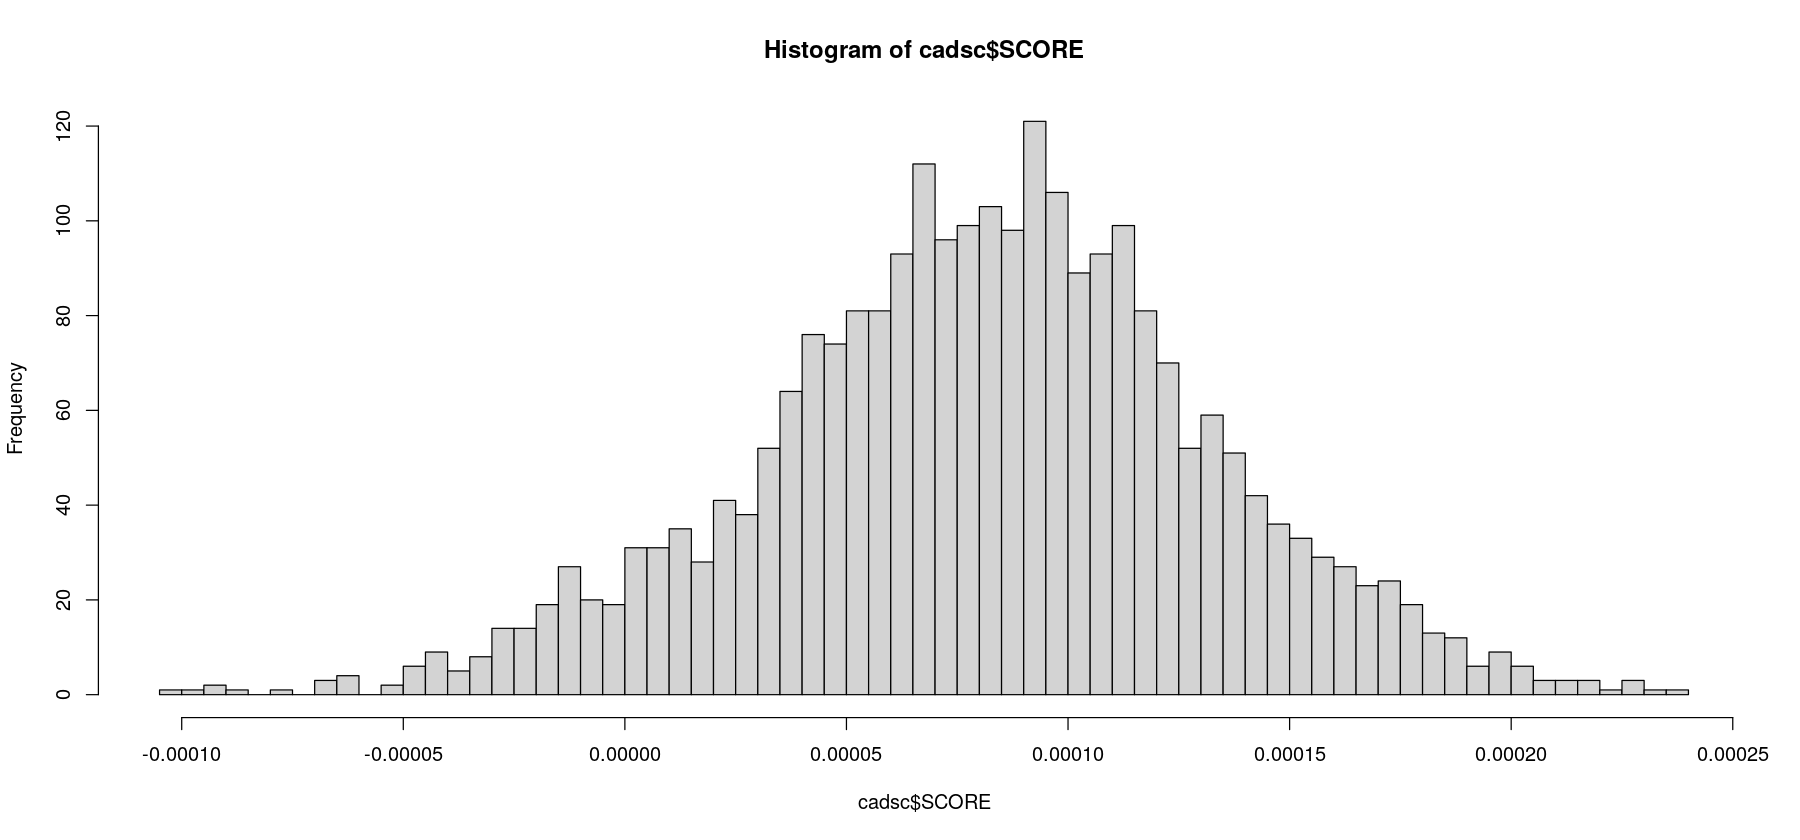

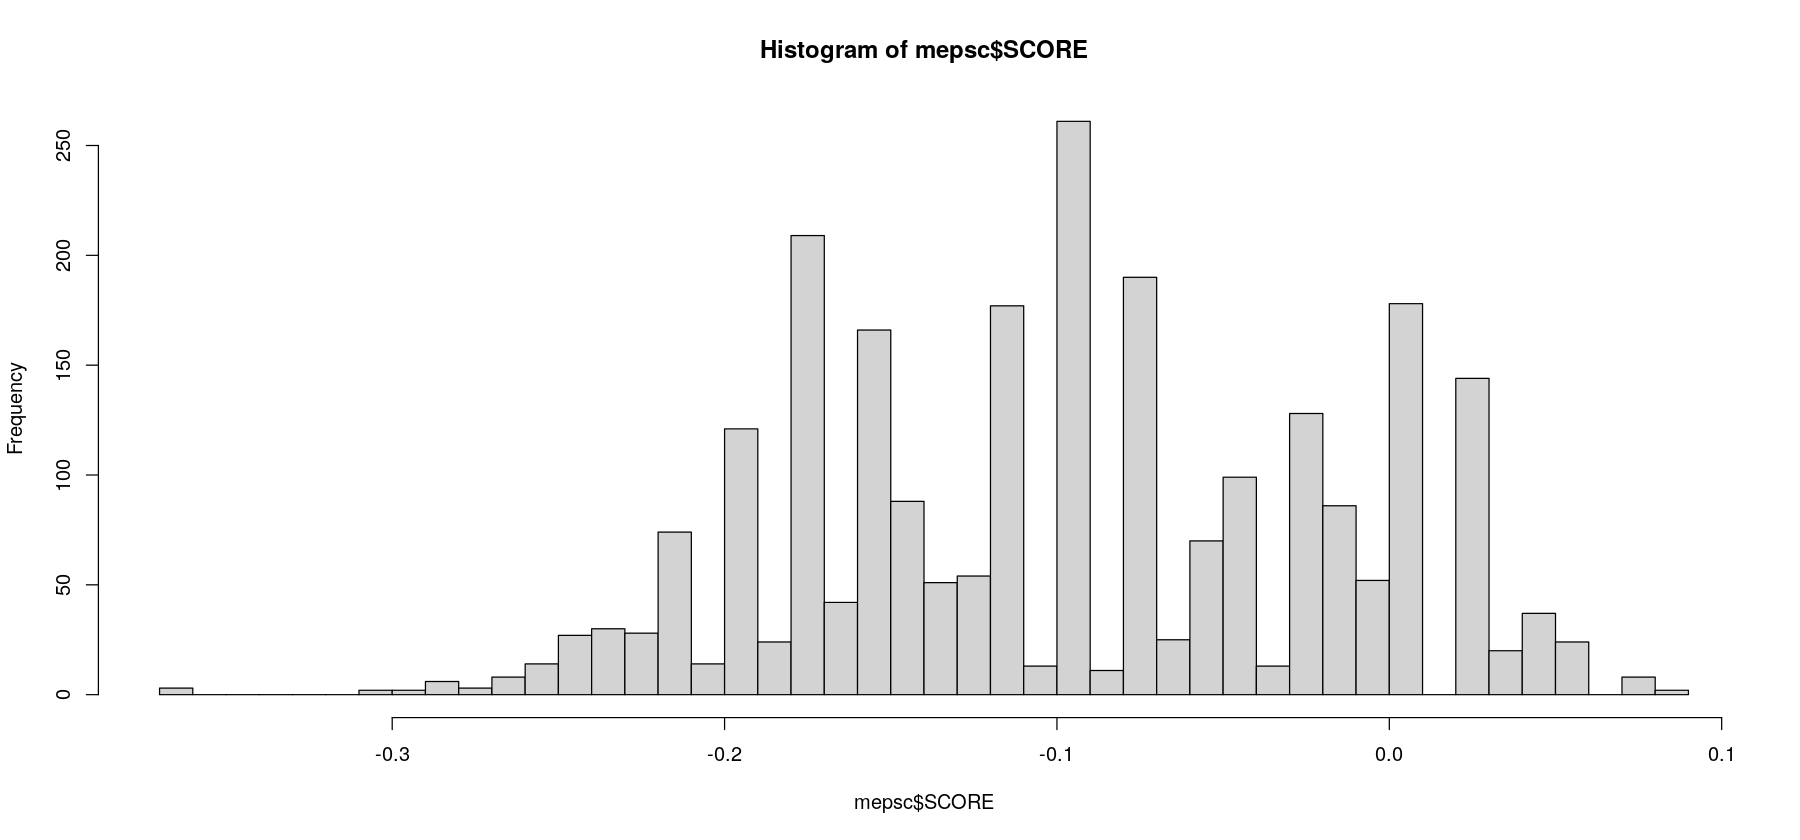

In [15]:
cadsc=fread("CAD.profile")
options(repr.plot.width=15)
hist(cadsc$SCORE, breaks=61)
mepsc=fread("MEP1B.profile")
hist(mepsc$SCORE, breaks=41)

### Method 2: Manually applying scores

In [16]:
genos=fread("autosomal.forPRS.mx.traw")

In [17]:
head(genos)

CHR,SNP,(C)M,POS,COUNTED,ALT,HG00096_HG00096,HG00097_HG00097,HG00099_HG00099,HG00100_HG00100,...,NA21128_NA21128,NA21129_NA21129,NA21130_NA21130,NA21133_NA21133,NA21135_NA21135,NA21137_NA21137,NA21141_NA21141,NA21142_NA21142,NA21143_NA21143,NA21144_NA21144
<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,chr1:1023851,0,1023851,A,G,0,1,2,1,...,1,2,1,0,0,0,2,1,1,0
1,chr1:1184478,0,1184478,T,C,0,0,0,0,...,0,1,0,0,1,0,1,1,1,0
1,chr1:1186644,0,1186644,C,T,0,0,0,0,...,1,0,2,1,0,1,1,1,1,0
1,chr1:1219478,0,1219478,T,C,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr1:1236037,0,1236037,C,T,1,1,2,1,...,1,0,0,0,1,1,0,0,0,1
1,chr1:1274972,0,1274972,G,A,0,0,0,0,...,0,1,1,1,0,1,1,2,2,0


In [18]:
spnames=colnames(genos)[7:ncol(genos)]

In [ ]:
mepg=genos[SNP %in% mepscore$id]

In [ ]:
mepg

In [34]:
mepscore

chr,pos,A1,A2,effect,id
<int>,<int>,<chr>,<chr>,<dbl>,<chr>
18,32038169,T,C,-0.2891709,chr18:32038169
18,32067215,C,T,0.4230704,chr18:32067215
18,32208550,G,C,-0.6470447,chr18:32208550
18,32224458,T,C,-0.6871607,chr18:32224458
18,32224900,A,T,-1.0701130,chr18:32224900
18,32317264,C,G,-0.5560340,chr18:32317264
18,32337385,C,T,0.3294772,chr18:32337385


In [41]:
mepg=colSums(mepg[,lapply(.SD, function(x) x*mepscore$effect), .SDcol=spnames])

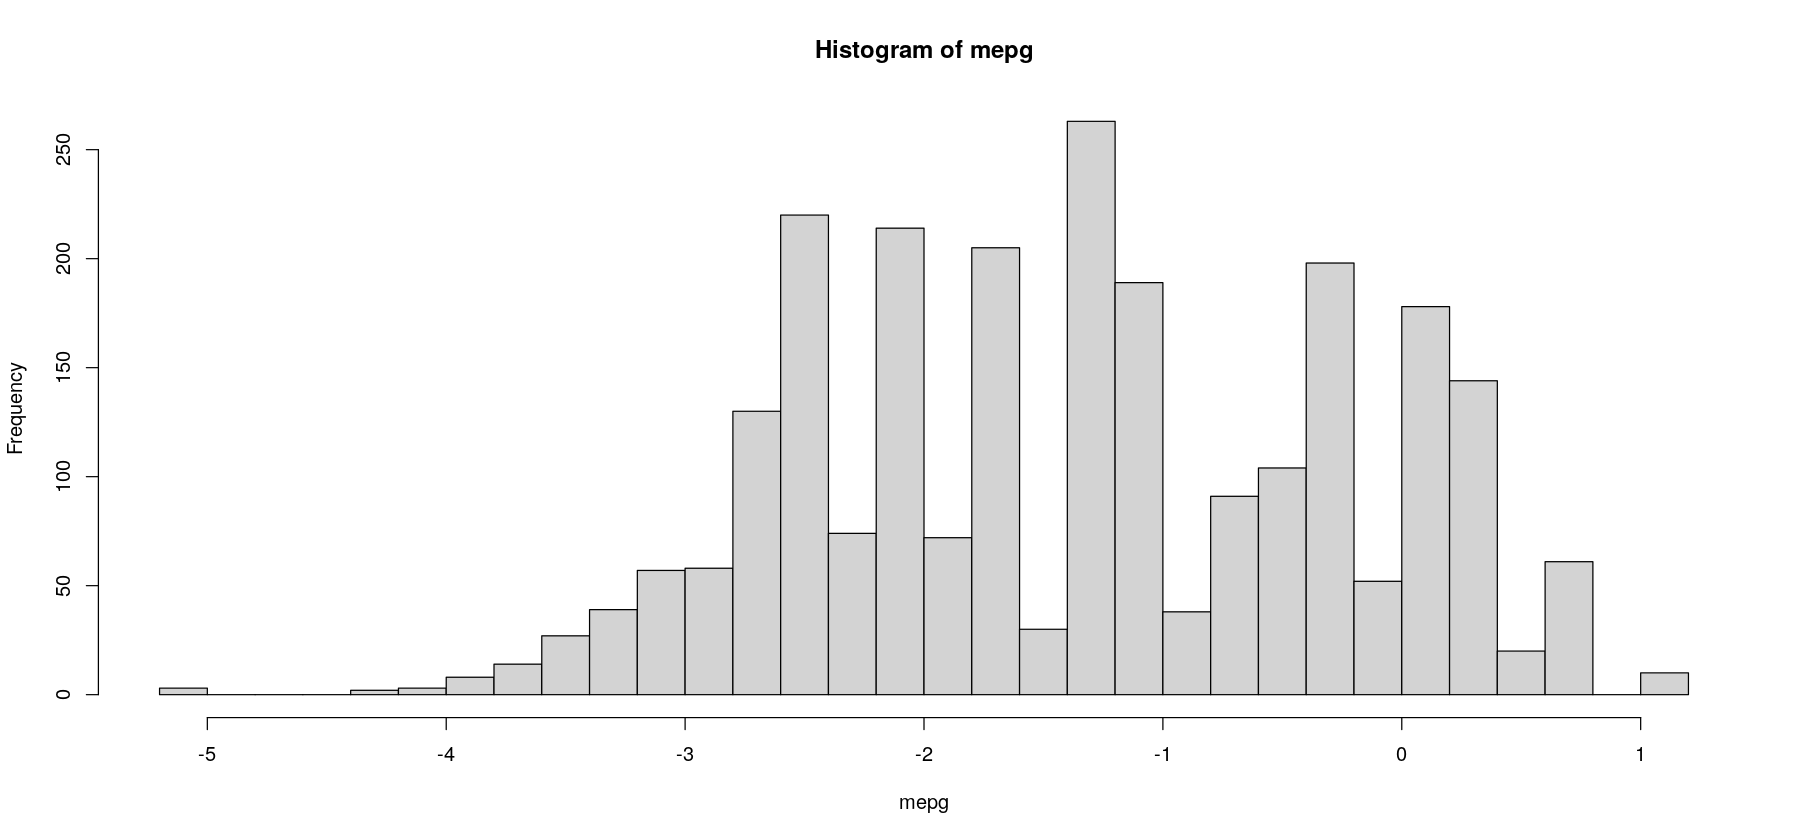

In [43]:
hist(mepg, breaks=41)

In [ ]:
cadg=genos[SNP %in% cadscore$id]